In [1]:
import pandas as pd

df=pd.read_csv('/content/Grammar Correction.csv', sep=',')

print(f'Data shape = {df.shape}')

df.head()

Data shape = (2018, 4)


,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [2]:
# summary of the dataset
summary = df.describe(include='all')
summary

,Serial Number,Error Type,Ungrammatical Statement,Standard English
count,2018.000000,2018,2018,2018
unique,NaN,36,2016,2009
top,NaN,Sentence Structure Errors,The plants needs to be watered every day.,The Earth revolves around the Sun.
freq,NaN,103,2,2
mean,1009.500000,NaN,NaN,NaN
std,582.690741,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,505.250000,NaN,NaN,NaN
50%,1009.500000,NaN,NaN,NaN
75%,1513.750000,NaN,NaN,NaN


In [3]:
#finding null values of the dataset

missing_values = df.isnull().sum()
missing_values

,0
Serial Number,0
Error Type,0
Ungrammatical Statement,0
Standard English,0


In [4]:
#cleaning the dataset

In [5]:
#removing duplicates
df_new = df.drop_duplicates()
print(f"old dataset's shape= {df.shape}")
print(f"new dataset's shape= {df_new.shape}")

old dataset's shape= (2018, 4)
new dataset's shape= (2018, 4)


In [6]:
#Standardize the text format

In [7]:
df.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [8]:
# removing leading spaces

df_new['Ungrammatical Statement'] = df_new['Ungrammatical Statement'].str.strip()
df_new['Standard English'] = df_new['Standard English'].str.strip()

In [9]:
# striping unwanted characters like numbers at the start
df_new['Ungrammatical Statement'] = df_new['Ungrammatical Statement'].str.replace(r'^\d+\.\s', '', regex=True)
df_new['Standard English'] = df_new['Standard English'].str.replace('^\d+\.\s+', '', regex=True)

In [10]:
print(f"new dataset's shape= {df_new.shape}")

new dataset's shape= (2018, 4)


In [11]:
# number of each type of grammatical error

error_counts = df_new['Error Type'].value_counts()
error_counts

,count
Error Type,
Sentence Structure Errors,103
Verb Tense Errors,100
Subject-Verb Agreement,100
Article Usage,100
Spelling Mistakes,100
Preposition Usage,95
Punctuation Errors,60
Relative Clause Errors,51
Gerund and Participle Errors,50


In [12]:
#analyzing the length of sentences in 'Ungrammatical Statement' and 'Standard English'
df_new['Ungrammatical Statement Length'] = df_new['Ungrammatical Statement'].apply(len)
df_new['Standard English Length'] = df_new['Standard English'].apply(len)

In [13]:
df_new.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

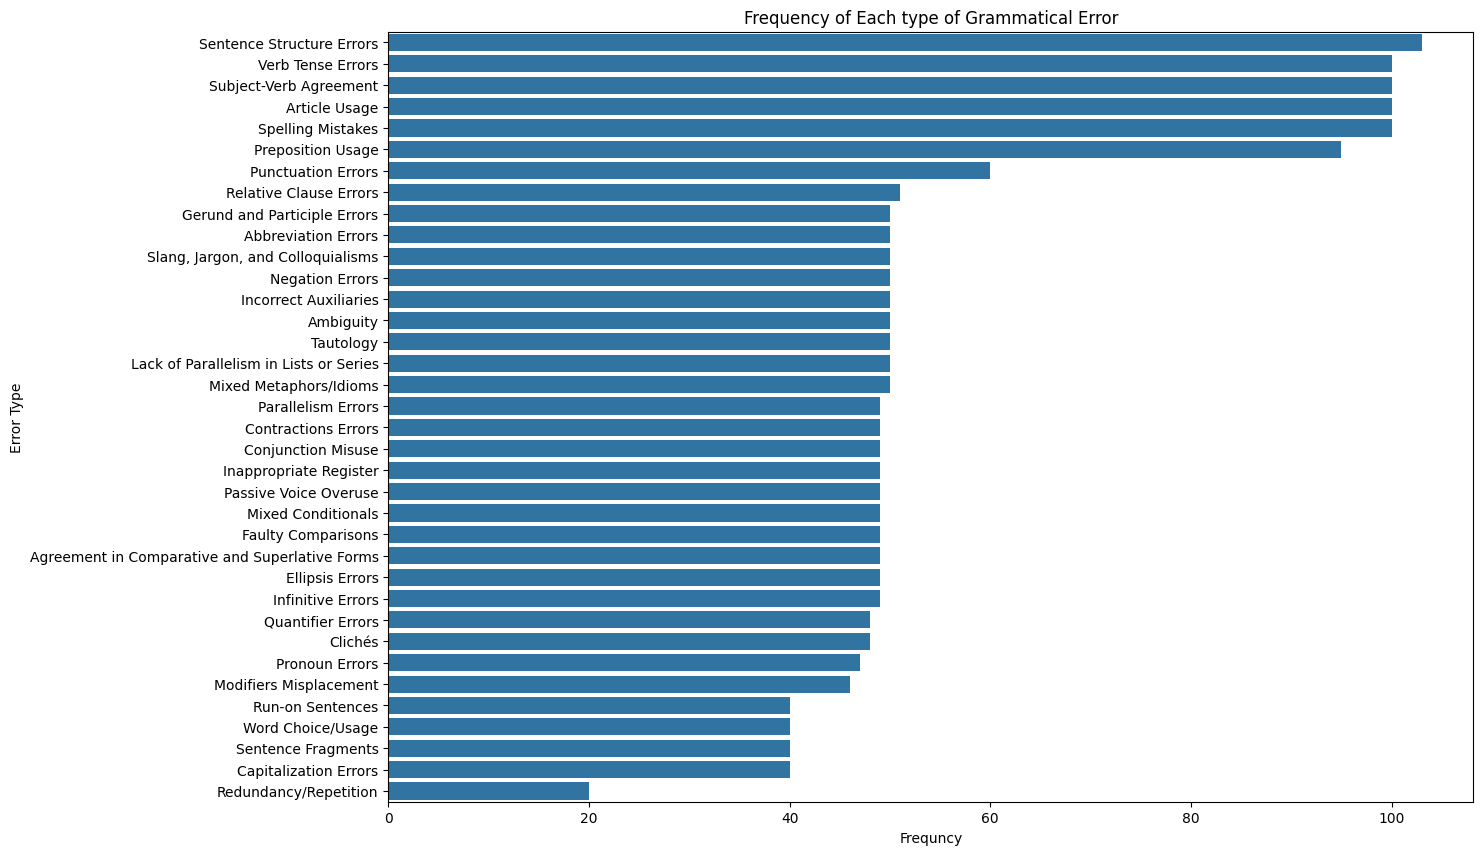

In [15]:
# visualizing the distributions of error types
plt.figure(figsize=(14,10))
error_type_plot = sns.countplot(y=df_new['Error Type'], order=df_new['Error Type'].value_counts().index)
error_type_plot.set_title('Frequency of Each type of Grammatical Error')
error_type_plot.set_xlabel('Frequncy')
error_type_plot.set_ylabel('Error Type')

sns.set_style("dark")

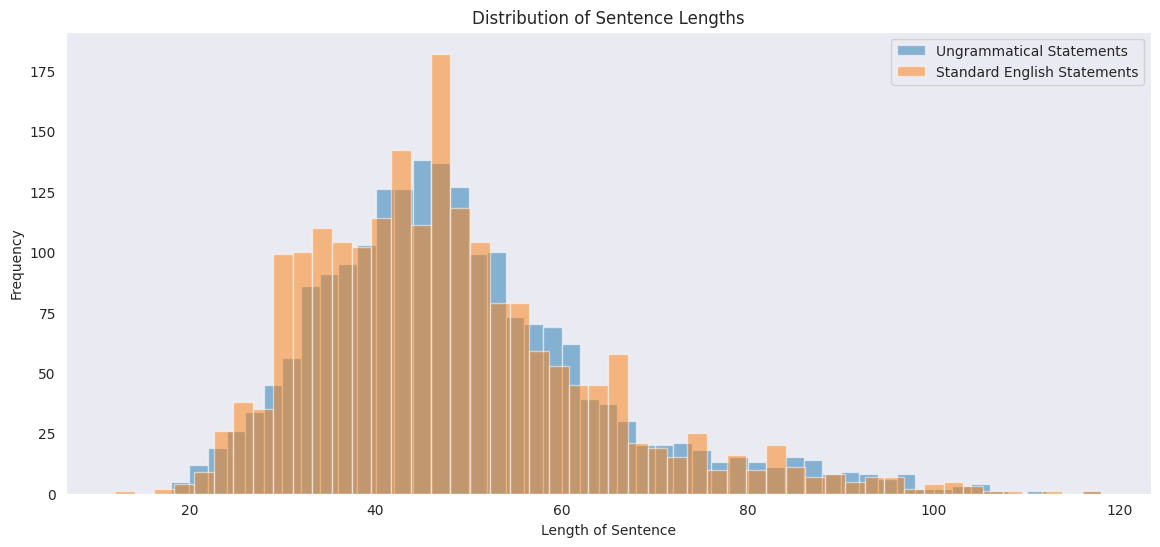

In [16]:
# visualization of the sentence lenght in both columns
plt.figure(figsize=(14,6))
plt.hist(df_new['Ungrammatical Statement Length'], bins=50, alpha=0.5, label='Ungrammatical Statements')
plt.hist(df_new['Standard English Length'], bins=50, alpha=0.5, label='Standard English Statements')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length of Sentence')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [17]:
#### word frequncey analysis ####

In [18]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#functions to calculate word frequency
def word_frequency(sentences):
  words = []
  for sentence in sentences:
    words.extend(word_tokenize(sentence.lower()))
  return Counter(words)

#calculating word frequency for botth ungrammatical and corrected statments
ungrammatical_freq = word_frequency(df_new['Ungrammatical Statement'])
corrected_freq = word_frequency(df_new['Standard English'])

#getting the top 20 most frequent words in each category
top_ungrammatical = ungrammatical_freq.most_common(20)
top_corrected = corrected_freq.most_common(20)

print(top_ungrammatical)
print(top_corrected)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('the', 2079), ('.', 1973), (',', 619), ('to', 518), ('a', 504), ('is', 475), ('was', 357), ('and', 304), ('i', 279), ('of', 277), ('in', 270), ('she', 258), ("'s", 246), ('he', 217), ('it', 204), ('for', 155), ('on', 148), ('by', 132), ("n't", 131), ('they', 118)]
[('the', 2118), ('.', 1972), (',', 542), ('to', 493), ('is', 453), ('a', 379), ('and', 341), ('was', 321), ('i', 293), ('in', 263), ('she', 256), ('of', 230), ('he', 214), ("'s", 170), ('for', 151), ('on', 134), ('at', 133), ("n't", 117), ('are', 112), ('it', 101)]


  Word  Frequency
0  the       2079
1    .       1973
2    ,        619
3   to        518
4    a        504
  Word  Frequency
0  the       2118
1    .       1972
2    ,        542
3   to        493
4   is        453


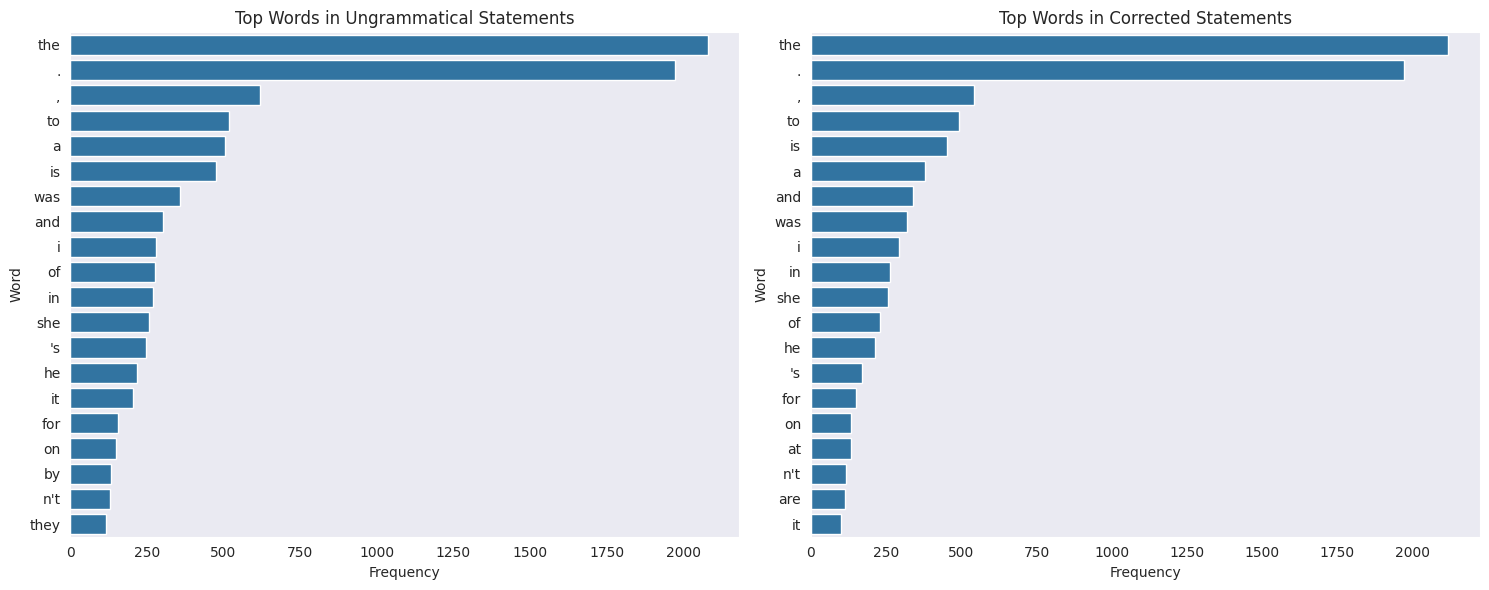

In [19]:
top_ungrammatical_df = pd.DataFrame(top_ungrammatical, columns=['Word', 'Frequency'])
top_corrected_df = pd.DataFrame(top_corrected, columns=['Word', 'Frequency'])

print(top_ungrammatical_df.head())
print(top_corrected_df.head())

#bar plot
plt.figure(figsize=(15,6))

#ungrammatical Statements
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=top_ungrammatical_df)
plt.title('Top Words in Ungrammatical Statements')

#corrected statements
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=top_corrected_df)
plt.title('Top Words in Corrected Statements')

plt.tight_layout()
plt.show()

In [20]:
# part of speech

In [21]:
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

def pos_tag_sentences(sentences):
    tagged_sentences = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tagged = pos_tag(tokens)
        tagged_sentences.extend(tagged)
    return tagged_sentences

tagged_ungrammatical = pos_tag_sentences(df_new['Ungrammatical Statement'])
tagged_corrected = pos_tag_sentences(df_new['Standard English'])

#counting the frequecny of each POS tag
ungrammatical_pos_counts = pd.Series([tag for _, tag in tagged_ungrammatical]). value_counts()
corrected_pos_counts = pd.Series([tag for _, tag in tagged_corrected]).value_counts()

print(ungrammatical_pos_counts)
print(corrected_pos_counts)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


NN      3828
DT      2877
.       2021
IN      1578
PRP     1307
JJ      1158
VBZ      972
NNS      938
VBD      868
VB       736
,        619
RB       588
TO       526
VBG      474
VBP      466
VBN      429
CC       422
PRP$     284
MD       227
NNP      209
POS      101
CD       101
RBR       79
JJR       70
:         53
WRB       52
RBS       47
RP        34
JJS       31
''        19
WDT       17
EX        15
WP        15
PDT        5
``         3
(          1
)          1
NNPS       1
Name: count, dtype: int64
NN      3666
DT      2769
.       2023
IN      1523
PRP     1162
JJ      1093
VBD      948
NNS      917
VBZ      878
VB       658
RB       550
,        542
VBG      525
TO       493
CC       432
VBP      412
VBN      385
PRP$     380
NNP      287
MD       200
CD       100
POS       80
JJR       61
WRB       59
RBR       57
JJS       44
:         35
RP        30
WP        27
WDT       22
EX        17
PDT       17
``         5
''         5
NNPS       5
(          3
)          3

In [22]:
# analyzing pos tags

      Ungrammatical  Corrected
''             19.0          5
(               1.0          3
)               1.0          3
,             619.0        542
.            2021.0       2023
:              53.0         35
CC            422.0        432
CD            101.0        100
DT           2877.0       2769
EX             15.0         17
FW              0.0          1
IN           1578.0       1523
JJ           1158.0       1093
JJR            70.0         61
JJS            31.0         44
MD            227.0        200
NN           3828.0       3666
NNP           209.0        287
NNPS            1.0          5
NNS           938.0        917
PDT             5.0         17
POS           101.0         80
PRP          1307.0       1162
PRP$          284.0        380
RB            588.0        550
RBR            79.0         57
RBS            47.0          2
RP             34.0         30
TO            526.0        493
VB            736.0        658
VBD           868.0        948
VBG     

<Figure size 2000x1400 with 0 Axes>

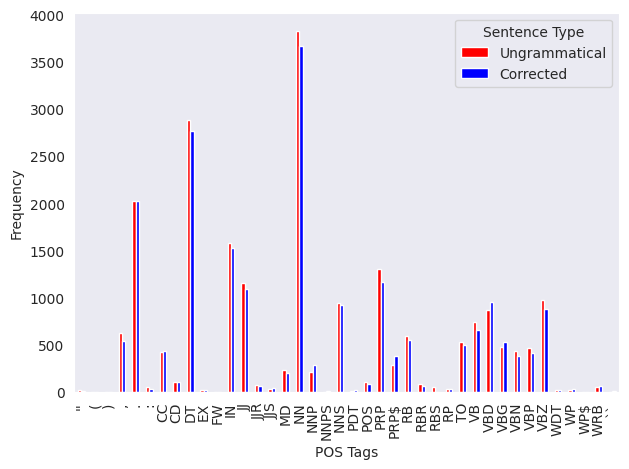

In [23]:
#converting dataframe for visualization

pos_df = pd.DataFrame({
    'Ungrammatical': ungrammatical_pos_counts,
    'Corrected': corrected_pos_counts
}).fillna(0)

print(pos_df)
#plot
plt.figure(figsize=(20,14))
pos_df.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Sentence Type')
plt.tight_layout()
plt.show()

In [24]:
pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 423.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.1 MB/s eta 0:00:00


In [25]:
import textstat

#compute the readability scores for ungrammatical sentences
ungrammatical_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_new['Ungrammatical Statement']]

#compute the readability scores for corrected sentences
corrected_readability = [textstat.flesch_reading_ease(sentence) for sentence in df_new['Standard English']]

avg_ungrammatical_score = sum(ungrammatical_readability) / len(ungrammatical_readability)
avg_corrected_score = sum(corrected_readability) / len(corrected_readability)

print(f'Average Ungrammatical Readability = {avg_ungrammatical_score}')
print(f'Average Coorected Readability = {avg_corrected_score}')

Average Ungrammatical Readability = 82.42183845391477
Average Coorected Readability = 80.11340931615477


In [26]:
pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.6 MB/s eta 0:00:00


In [27]:
import numpy as np
from Levenshtein import distance as levenshtein_distance

#assuming 'ungrammatical_sentences' and 'corrected_sentences' are lists of sentences
difficulty_index = []

for ungrammatical, corrected in zip(df_new['Ungrammatical Statement'], df_new['Standard English']):
  edit_distance = levenshtein_distance(ungrammatical, corrected)
  normalized_difficulty = edit_distance / max(len(ungrammatical), len(corrected))
  difficulty_index.append(normalized_difficulty)

difficulty_index = np.array(difficulty_index)

difficulty_levels = ['Easy' if x < 0.2 else 'Medium' if x < 0.5 else 'Hard' for x in difficulty_index]

difficulty_counts = Counter(difficulty_levels)

difficulty_counts

Counter({'Easy': 1546, 'Medium': 371, 'Hard': 101})

In [28]:
## N-gram Analysis

In [29]:
from nltk import bigrams, trigrams
from collections import Counter

tokens = [nltk.word_tokenize(sentence.lower()) for sentence in df_new['Ungrammatical Statement']]

#bi-grams and tri-grams
bi_grams = [gram for sentence in tokens for gram in bigrams(sentence)]
tri_grams = [gram for sentence in tokens for gram in trigrams(sentence)]

#counting
bi_grams_freq = Counter(bi_grams)
tri_grams_freq = Counter(tri_grams)

#most common bi-grams and tri-grams
most_common_bi = bi_grams_freq.most_common(10)
most_common_tri = tri_grams_freq.most_common(10)

most_common_bi, most_common_tri

([(('in', 'the'), 142),
  ((',', 'and'), 142),
  ((',', 'but'), 100),
  (('to', 'the'), 87),
  (('of', 'the'), 82),
  (('by', 'the'), 79),
  (('it', "'s"), 75),
  (('at', 'the'), 60),
  (('on', 'the'), 53),
  (('the', 'store'), 45)],
 [((',', 'and', 'to'), 43),
  ((',', 'but', 'it'), 32),
  ((',', 'and', 'it'), 23),
  (('went', 'to', 'the'), 20),
  (('the', 'movie', 'was'), 19),
  ((',', 'it', "'s"), 19),
  (('to', 'the', 'store'), 18),
  (('but', 'it', 'is'), 18),
  (('the', 'group', 'of'), 15),
  (('is', 'the', 'most'), 15)])

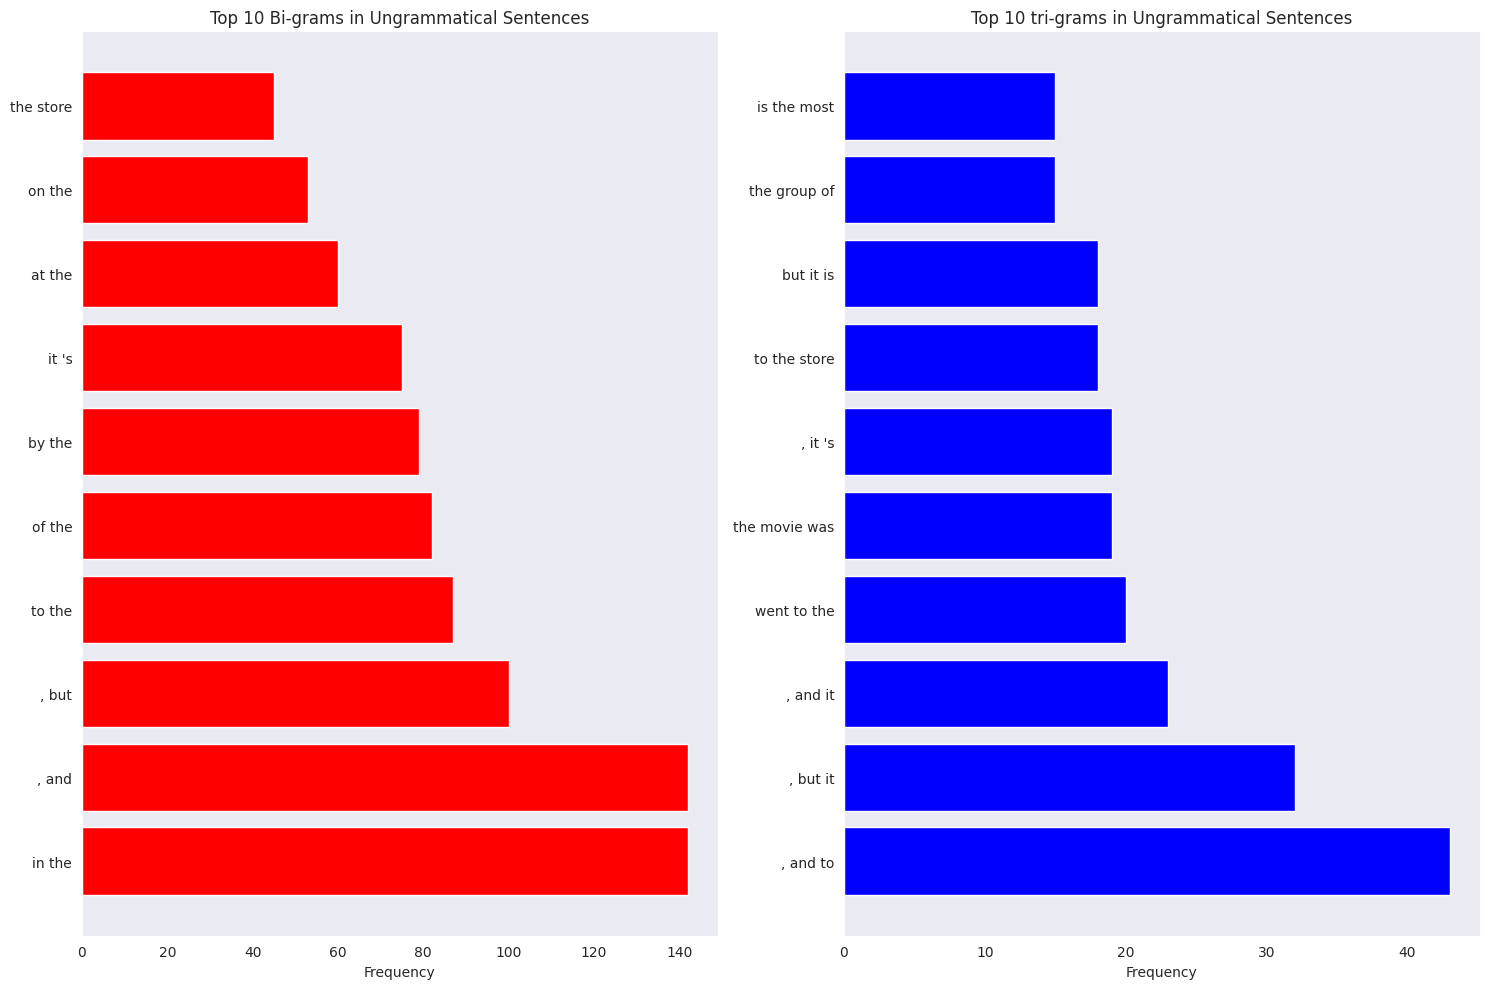

In [30]:
bi_grams, bi_freq = zip(*most_common_bi)
tri_grams, tri_freq = zip(*most_common_tri)

#converting n gram tuples to strings
bi_grams_str = [' '.join(gram) for gram in bi_grams]
tri_grams_str = [' '.join(gram) for gram in tri_grams]

plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.barh(bi_grams_str, bi_freq, color='red')
plt.xlabel('Frequency')
plt.title('Top 10 Bi-grams in Ungrammatical Sentences')

plt.subplot(1, 2, 2)
plt.barh(tri_grams_str, tri_freq, color='blue')
plt.xlabel('Frequency')
plt.title('Top 10 tri-grams in Ungrammatical Sentences')

plt.tight_layout()
plt.show()

In [31]:
!pip install textblob
from textblob import TextBlob
ungrammatical_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_new['Ungrammatical Statement']]
corrected_sentiments = [TextBlob(sentence).sentiment.polarity for sentence in df_new['Standard English']]

#calculating average sentiment, compare individual sentence sentiment
avg_ug_sentiment = sum(ungrammatical_sentiments) / len(ungrammatical_sentiments)
avg_corr_sentiment = sum(corrected_sentiments) / len(corrected_sentiments)

print(f'Average Sentiment for Ungrammatical Sentences:{avg_ug_sentiment}')
print(f'Average Sentiment for Corrected Senetences:{avg_corr_sentiment}')


Average Sentiment for Ungrammatical Sentences:0.0987968938340592
Average Sentiment for Corrected Senetences:0.0898120780634406


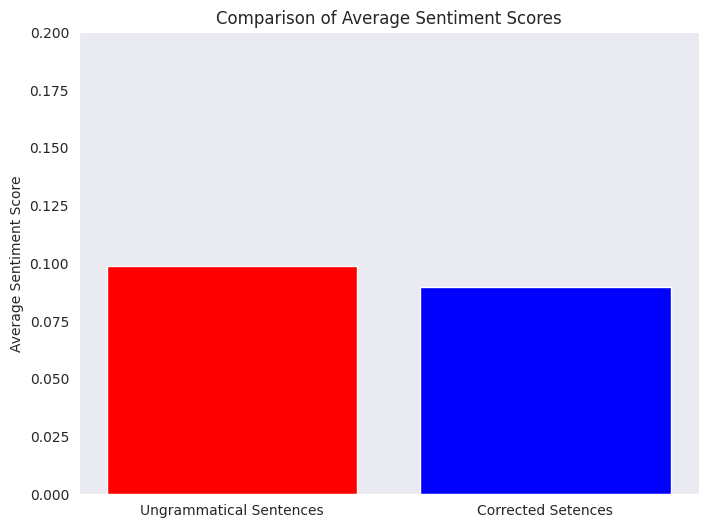

In [32]:
# sentiment scores
scores = [avg_ug_sentiment, avg_corr_sentiment]
labels = ['Ungrammatical Sentences', 'Corrected Setences']

plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['red', 'blue'])
plt.ylabel('Average Sentiment Score')
plt.title('Comparison of Average Sentiment Scores')
plt.ylim(0, 0.2)
plt.show()

In [33]:
###Correction Pattern Mining

In [34]:
from nltk import word_tokenize

nltk.download('punkt')

def align_and_find_changes(sentence1, sentence2):
  tokens1 = word_tokenize(sentence1)
  tokens2 = word_tokenize(sentence2)
  max_len = max(len(tokens1), len(tokens2))
  aligned_tokens1 = tokens1 + [''] * (max_len - len(tokens1))
  aligned_tokens2 = tokens2 + [''] * (max_len - len(tokens2))

  changes = []
  for token1, token2 in zip(aligned_tokens1, aligned_tokens2):
    if token1 != token2:
      changes.append((token1, token2))
  return changes

#apply the function to each pair of sentences
df_new['Changes'] = df_new.apply(lambda row: align_and_find_changes(row['Ungrammatical Statement'], row['Standard English']), axis=1)
df_new.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length,Changes
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]"
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]"
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]"
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]"
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]"


In [35]:
from collections import Counter

# Flatten the list of changes and count the occurrences
all_changes = [change for changes in df_new['Changes'] for change in changes]
change_counter = Counter(all_changes)

# Display the most common changes
most_common_changes = change_counter.most_common(20)
print("Most Common Changes:")
for change, frequency in most_common_changes:
    print(f"{change}: {frequency}")

Most Common Changes:
('.', ''): 661
('', '.'): 351
('a', 'the'): 63
(',', '.'): 56
(',', 'and'): 46
('was', 'were'): 41
('the', '.'): 41
('but', ''): 41
('the', ''): 40
('it', 'its'): 38
('no', 'any'): 34
('is', ''): 31
('...', ','): 28
('in', 'the'): 25
('it', '.'): 24
(',', 'was'): 22
('the', 'in'): 21
('a', ''): 20
('of', 'the'): 19
('they', 'their'): 19


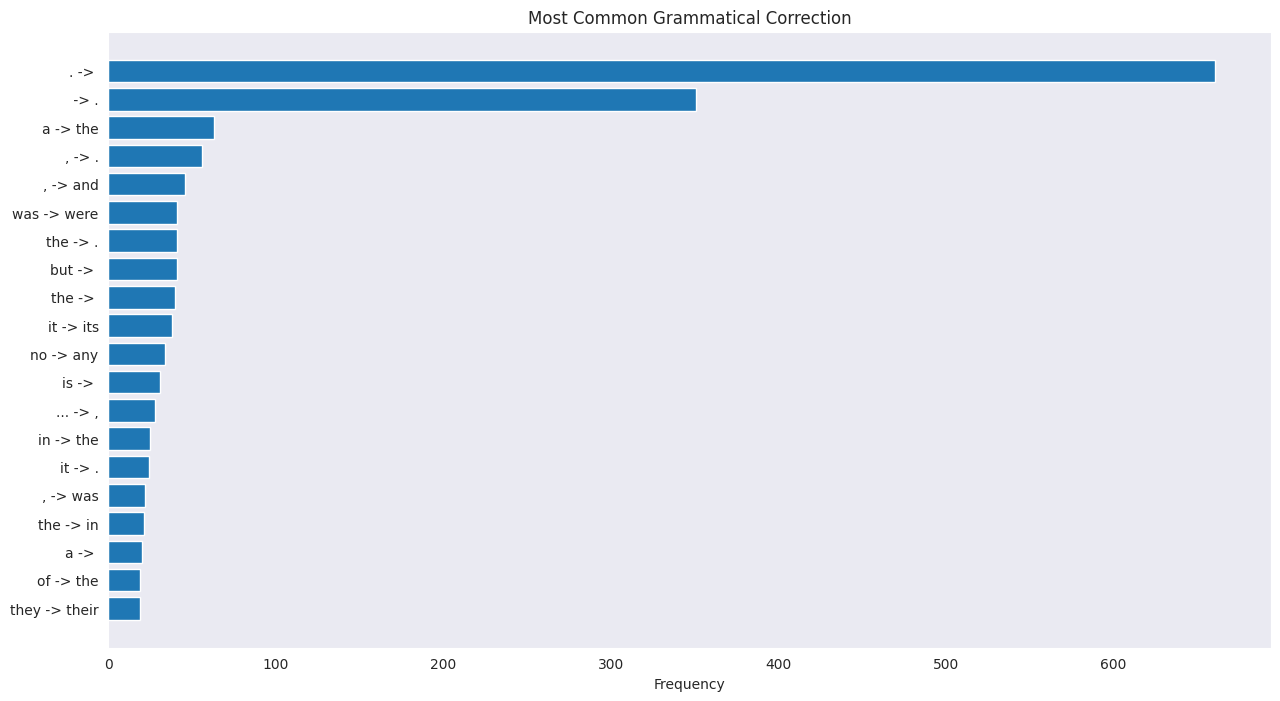

In [36]:
changes, frequencies = zip(*most_common_changes)

#convert change tuples to string format for labeling
change_labels = [f'{original} -> {corrected}' for original, corrected in changes]

plt.figure(figsize=(15,8))
plt.barh(change_labels, frequencies)
plt.xlabel('Frequency')
plt.title('Most Common Grammatical Correction')
plt.gca().invert_yaxis()
plt.show()


In [37]:
def categorize_change(change):
  original, corrected = change
  if original == '':
    return 'Insertion'
  elif corrected == '':
    return 'Deletion'
  else:
    return 'Substitution'

df_new['Change Types'] = df_new['Changes'].apply(lambda chnages: [categorize_change(change) for change in changes])
df_new.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length,Changes,Change Types
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]","[Deletion, Insertion, Substitution, Substituti..."
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]","[Deletion, Insertion, Substitution, Substituti..."
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]","[Deletion, Insertion, Substitution, Substituti..."
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]","[Deletion, Insertion, Substitution, Substituti..."
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]","[Deletion, Insertion, Substitution, Substituti..."


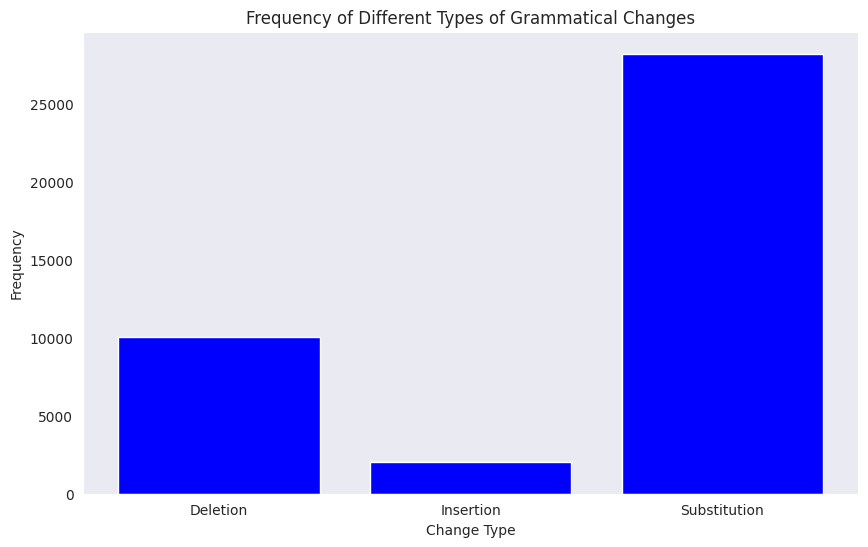

In [38]:
from collections import Counter

change_type_counter = Counter([change_type for change_types in df_new['Change Types'] for change_type in change_types])

change_types, frequencies = zip(*change_type_counter.items())

plt.figure(figsize=(10, 6))
plt.bar(change_types, frequencies, color='blue')
plt.xlabel('Change Type')
plt.ylabel('Frequency')
plt.title('Frequency of Different Types of Grammatical Changes')
plt.show()

# contexual Analysis

In [39]:
context_window = 2

def extract_context(sentence, index, window):
  words = nltk.word_tokenize(sentence)
  start = max(0, index - window)
  end = min(len(words), index + window + 1)
  return ' '.join(words[start:end])

df_new['Contexts'] = df_new.apply(lambda row: [extract_context(row['Ungrammatical Statement'], i, context_window) for i, _ in enumerate(nltk.word_tokenize(row['Ungrammatical Statement'])) if (row['Ungrammatical Statement'][i], row['Standard English'][i]) in row['Changes']], axis=1)
df_new.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Ungrammatical Statement Length,Standard English Length,Changes,Change Types,Contexts
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,29,27,"[(goes, go)]","[Deletion, Insertion, Substitution, Substituti...",[]
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,35,36,"[(was, were)]","[Deletion, Insertion, Substitution, Substituti...",[]
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,32,31,"[(have, has)]","[Deletion, Insertion, Substitution, Substituti...",[]
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,25,27,"[(do, does)]","[Deletion, Insertion, Substitution, Substituti...",[]
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,25,26,"[(rise, rises)]","[Deletion, Insertion, Substitution, Substituti...",[]


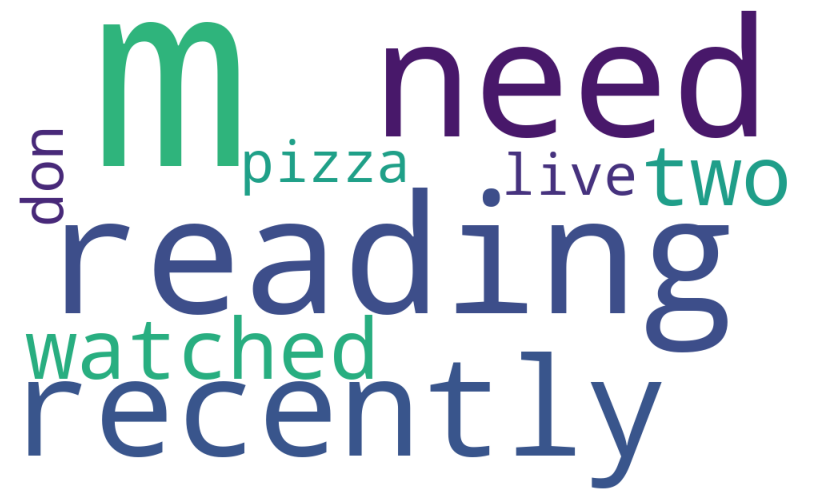

In [40]:
!pip install wordcloud
from wordcloud import WordCloud

#flatten the list of contexts
all_contexts = [context for contexts in df_new['Contexts'] for context in contexts]

#join all context into a single string
all_contexts_string = ' '.join(all_contexts)

wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 10).generate(all_contexts_string)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [41]:

text_df = pd.read_csv("/content/Grammar Correction.csv", sep=",")


In [42]:
text_df.head(10)

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.
5,6,Verb Tense Errors,I am eat pizza for lunch.,I am eating pizza for lunch.
6,7,Verb Tense Errors,The students studies for the exam.,The students study for the exam.
7,8,Verb Tense Errors,The car need to be repaired.,The car needs to be repaired.
8,9,Verb Tense Errors,She will goes to the party tonight.,She will go to the party tonight.
9,10,Verb Tense Errors,They watches the movie together.,They watch the movie together.


Text(0, 0.5, 'Error Type')

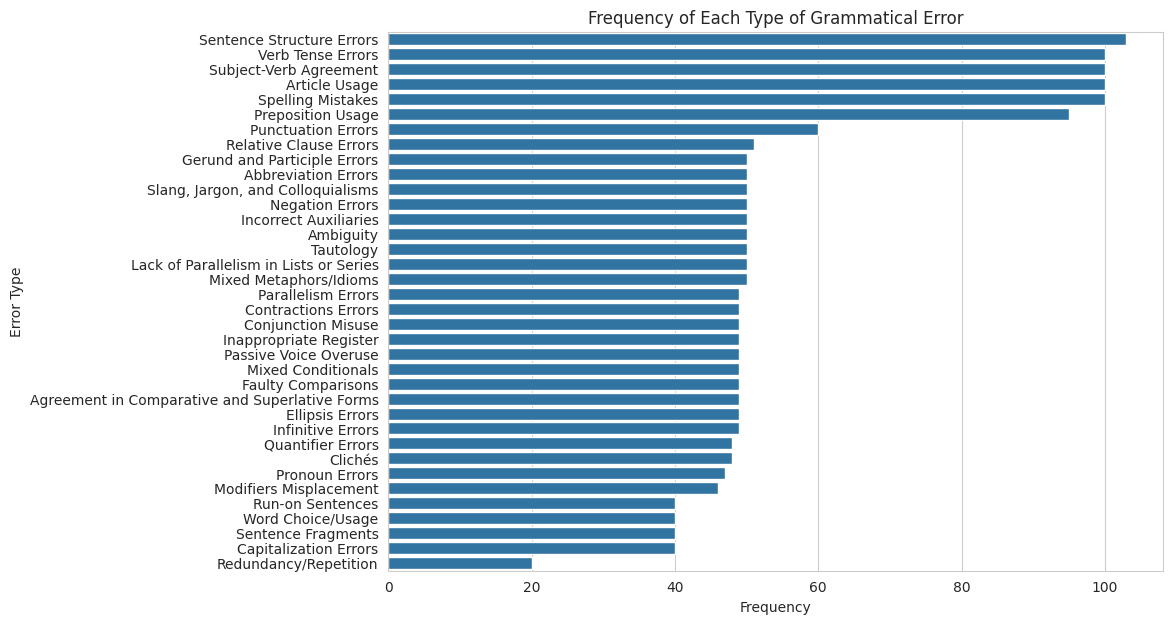

In [43]:
#displaying the shape of the dataset to understand the number of rows and columns in the dataset
sns.set_style("whitegrid")
plt.figure(figsize = (10, 7))
error_type_plot = sns.countplot(y = text_df["Error Type"], order = text_df["Error Type"].value_counts().index)
error_type_plot.set_title("Frequency of Each Type of Grammatical Error")
error_type_plot.set_xlabel("Frequency")
error_type_plot.set_ylabel('Error Type')

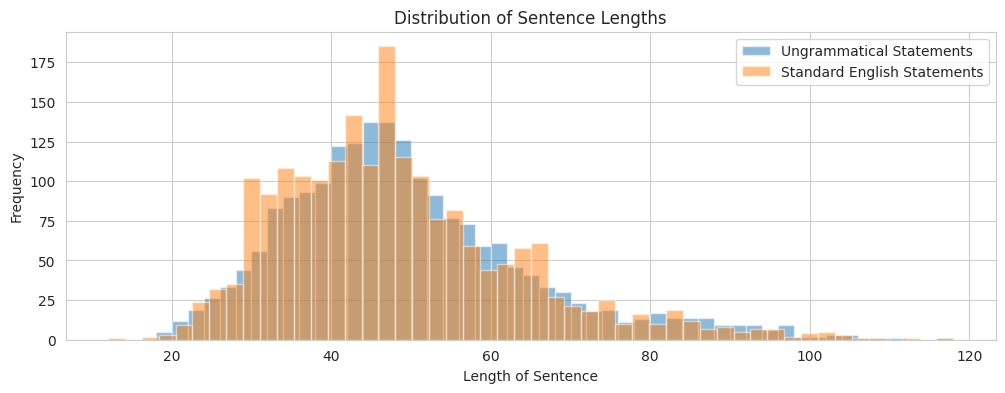

In [44]:
#adding the length of the ungrammatical and standard English statements to the dataset
text_df["Ungrammatical Length"] = text_df["Ungrammatical Statement"].apply(len)
text_df["Standard Length"] = text_df['Standard English'].apply(len)

#displaying the distribution of sentence lengths for the lengths for the ungrammatical and standard English statements
plt.figure(figsize = (12, 4))
plt.hist(text_df['Ungrammatical Length'], bins = 50, alpha = 0.5, label= "Ungrammatical Statements")
plt.hist(text_df["Standard Length"], bins = 50, alpha = 0.5, label = "Standard English Statements")
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Length of Sentence")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# **GRAMMAR CORRECTION WITH DIFFERENT MODELS**




In [45]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [46]:
!pip install optuna
import torch
import optuna
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, DataLoader
from nltk.translate.bleu_score import sentence_bleu
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import SmoothingFunction
from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer, AutoModelForSeq2SeqLM

#setting the device to cuda if available else cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

df = pd.read_csv("/content/Grammar Correction.csv", sep=",")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


In [47]:
print(df.shape)
df.head(5)

(2018, 4)


,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [48]:
class GrammarCorrectionDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        ungrammatical_statement = self.dataframe.iloc[idx]["Ungrammatical Statement"]
        standard_english = self.dataframe.iloc[idx]["Standard English"]
        return ungrammatical_statement, standard_english

In [49]:
# spliting the dataset into training, validation, and test sets with 80%, 10%, and 10%
train_df, test_df = train_test_split(df, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.1)

# Create the datasets
train_dataset = GrammarCorrectionDataset(train_df)
val_dataset = GrammarCorrectionDataset(val_df)
test_dataset = GrammarCorrectionDataset(test_df)

In [50]:
!pip install evaluate
import evaluate

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)
dataloaders = (train_dataloader, val_dataloader, test_dataloader)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [51]:
import torch
from transformers import AdamW
import evaluate

# Load BLEU metric
bleu = evaluate.load("bleu")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# **GEC-T5-Small model**

In [55]:
def train_model(model,tokenizer,dataloaders,num_epochs):                        #*fsddsgffffffffffffffffffffffffffffffffffffffffhfpouiho**

  # Define evaluation function to calculate both BLEU and accuracy
  def evaluate_model(model, dataloader):
      model.eval()  # Set model to evaluation mode
      predictions = []
      references = []
      exact_matches = 0  # For calculating accuracy
      total_examples = 0

      for batch in dataloader:
          ungrammatical_statement, standard_english = batch
          ungrammatical_statement = list(ungrammatical_statement)

          # Tokenize input sentences
          inputs = tokenizer(ungrammatical_statement, return_tensors="pt", padding=True, truncation=True, max_length=256)

          # Generate predictions from the model
          with torch.no_grad():
              outputs = model.generate(**inputs, max_new_tokens=256)

          # Decode the outputs and add them to the list
          for idx, output in enumerate(outputs):
              corrected_sentence = tokenizer.decode(output, skip_special_tokens=True)
              predictions.append(corrected_sentence)
              reference_sentence = standard_english[idx]

              # Add the ground-truth references (they should remain as full sentences)
              references.append(reference_sentence)

              # Check if prediction exactly matches the reference (for accuracy calculation)
              if corrected_sentence == reference_sentence:
                  exact_matches += 1
              total_examples += 1

      # Compute BLEU score (predictions and references are passed as full sentences, not split into words)
      bleu_score = bleu.compute(predictions=predictions, references=[[ref] for ref in references])['bleu']

      # Calculate accuracy as the proportion of exact matches
      accuracy = exact_matches / total_examples

      return bleu_score, accuracy # Uncomment this line to return the values

  train_dataloader, val_dataloader, test_dataloader = dataloaders
  # Define a low learning rate optimizer
  optimizer = AdamW(model.parameters(), lr=1e-3)  # Small learning rate

  # Training loop with minimal optimization
  num_epochs = num_epochs  # Minimal number of epochs
  for epoch in range(num_epochs):
      print(f"\nEpoch {epoch + 1}/{num_epochs}")

      # Set model to training mode
      model.train()

      # Loop over training data in batches
      for batch in train_dataloader:
          ungrammatical_statement, standard_english = batch

          # Tokenize input and output sentences
          inputs = tokenizer(list(ungrammatical_statement), return_tensors="pt", padding=True, truncation=True, max_length=256)
          labels = tokenizer(list(standard_english), return_tensors="pt", padding=True, truncation=True, max_length=256).input_ids

          # Forward pass
          outputs = model(input_ids=inputs.input_ids, attention_mask=inputs.attention_mask, labels=labels)
          loss = outputs.loss

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

      # Print training loss for monitoring
      print(f"Training Loss: {loss.item()}")

      # Evaluate on the training, validation, and test sets
      train_bleu_score, train_accuracy = evaluate_model(model, train_dataloader)
      print(f"Training BLEU Score: {train_bleu_score}, Training Accuracy: {train_accuracy}")

      val_bleu_score, val_accuracy = evaluate_model(model, val_dataloader)
      print(f"Validation BLEU Score: {val_bleu_score}, Validation Accuracy: {val_accuracy}")

      test_bleu_score, test_accuracy = evaluate_model(model, test_dataloader)
      print(f"Test BLEU Score: {test_bleu_score}, Test Accuracy: {test_accuracy}")

       # Return the validation and test BLEU scores
      return val_bleu_score, test_bleu_score # Added return statement

In [56]:
import matplotlib.pyplot as plt                                                     #*fsddsgffffffffffffffffffffffffffffffffffffffffhfpouiho**

# Dictionary to store BLEU scores for each model
bleu_scores = {
    'Model Name': [],
    'Validation BLEU': [],
    'Test BLEU': [],
    'Model Path': []  # Store the model save path
}

# Model configurations and names
model_configs = [
    ("google-t5/t5-small", "t5-small", "t5_small_model"),
    ("vennify/t5-base-grammar-correction", "t5-base", "t5_gec_model"),
    ("Unbabel/gec-t5_small", "t5-small", "unbabel_gec_model"),
    ("Rosi-si/my_awesome_gec", "t5-small", "rosisi_gec_model"),
    ("prithivida/grammar_error_correcter_v1", "t5-small", "pv_gec_model")
]

In [57]:
# Train each model and collect BLEU scores
for model_name, tokenizer_name, save_path in model_configs:
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    tokenizer = T5Tokenizer.from_pretrained(tokenizer_name)

    # Train model and collect BLEU scores
    val_bleu, test_bleu = train_model(model, tokenizer, dataloaders, num_epochs=1)

    # Append the results to the dictionary
    bleu_scores['Model Name'].append(model_name)
    bleu_scores['Validation BLEU'].append(val_bleu)
    bleu_scores['Test BLEU'].append(test_bleu)
    bleu_scores['Model Path'].append(save_path)  # Store the path

    # Save the model
    model.save_pretrained(save_path)
    tokenizer.save_pretrained(save_path)
    print(f"Model saved to {save_path}")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/1
Training Loss: 0.2613508999347687
Training BLEU Score: 0.8533819595463472, Training Accuracy: 0.6053719008264463
Validation BLEU Score: 0.7643665225604325, Validation Accuracy: 0.42592592592592593
Test BLEU Score: 0.7786839207870322, Test Accuracy: 0.4207920792079208
Model saved to t5_small_model


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/1
Training Loss: 0.1886119395494461
Training BLEU Score: 0.8028989058523961, Training Accuracy: 0.6212121212121212
Validation BLEU Score: 0.7298416632334975, Validation Accuracy: 0.3888888888888889
Test BLEU Score: 0.7565829554795382, Test Accuracy: 0.4282178217821782
Model saved to t5_gec_model


config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/1
Training Loss: 0.14341901242733002
Training BLEU Score: 0.920319172564547, Training Accuracy: 0.796831955922865
Validation BLEU Score: 0.8037903566566195, Validation Accuracy: 0.5370370370370371
Test BLEU Score: 0.8307173397876709, Test Accuracy: 0.556930693069307
Model saved to unbabel_gec_model


config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/1
Training Loss: 0.28809550404548645
Training BLEU Score: 0.89929282818243, Training Accuracy: 0.7603305785123967
Validation BLEU Score: 0.8058824580938341, Validation Accuracy: 0.5432098765432098
Test BLEU Score: 0.8250367256749738, Test Accuracy: 0.5445544554455446
Model saved to rosisi_gec_model


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Epoch 1/1
Training Loss: 0.39853134751319885
Training BLEU Score: 0.8661483143397517, Training Accuracy: 0.778236914600551
Validation BLEU Score: 0.6991992253455825, Validation Accuracy: 0.5493827160493827
Test BLEU Score: 0.8115765465577796, Test Accuracy: 0.5445544554455446
Model saved to pv_gec_model


In [58]:
# Find the model path for the best test BLEU score
best_test_index = bleu_scores['Test BLEU'].index(max(bleu_scores['Test BLEU']))
best_test_model_path = bleu_scores['Model Path'][best_test_index]

print(f"Best model path with highest test BLEU score: {best_test_model_path}")

Best model path with highest test BLEU score: unbabel_gec_model


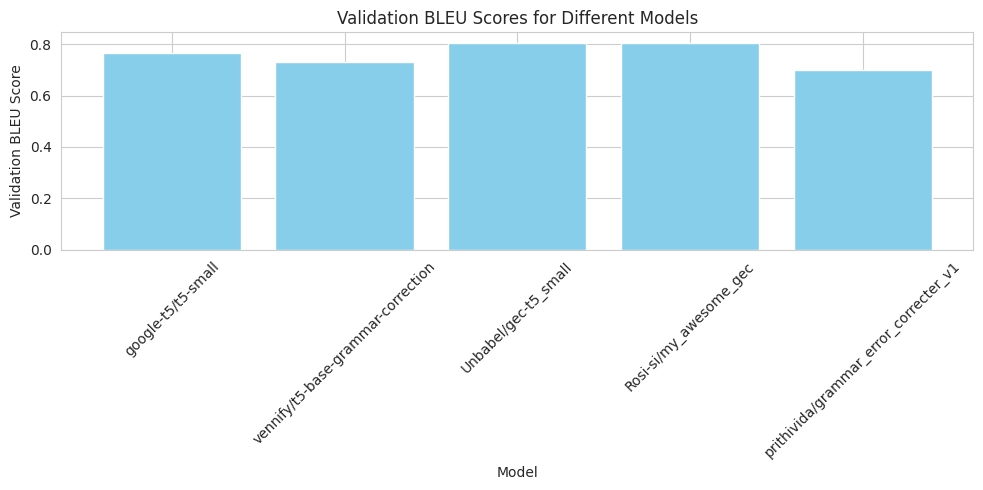

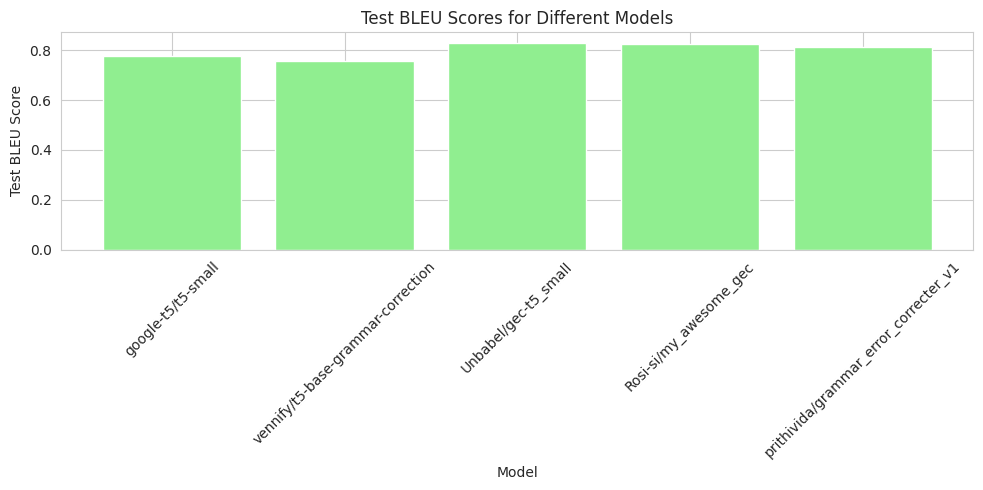

In [59]:
# Plot Validation BLEU Scores                                                    #*fsddsgffffffffffffffffffffffffffffffffffffffffhfpouiho**
plt.figure(figsize=(10, 5))
plt.bar(bleu_scores['Model Name'], bleu_scores['Validation BLEU'], color='skyblue')
plt.xlabel("Model")
plt.ylabel("Validation BLEU Score")
plt.title("Validation BLEU Scores for Different Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Test BLEU Scores
plt.figure(figsize=(10, 5))
plt.bar(bleu_scores['Model Name'], bleu_scores['Test BLEU'], color='lightgreen')
plt.xlabel("Model")
plt.ylabel("Test BLEU Score")
plt.title("Test BLEU Scores for Different Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
# Find the index of the maximum Validation BLEU score
max_test_bleu_idx = bleu_scores['Test BLEU'].index(max(bleu_scores['Test BLEU']))

# Retrieve the model name and score with the best validation BLEU score
best_model_name = bleu_scores['Model Name'][max_test_bleu_idx]

print(f"The best performing model {best_model_name} and its score it has got is {max_test_bleu_idx}")

NameError: name 'bleu_scores' is not defined

# **Google T5-Small**

# **T5-Base-GC**

# **GEC Model**

# **GEC_V1**

In [61]:
# Initialize tokenizer and model

model = AutoModelForSeq2SeqLM.from_pretrained(best_test_model_path)
def correct_grammar(model, ungrammatical_statement):
    # Setting the model to evaluation mode
    model.eval()

    # Adding a prompt to ensure output is in English
    prompt = f"translate to English: {ungrammatical_statement}"

    # Tokenizing the input and generating the corrected sentence
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=256)
    outputs = model.generate(**inputs, max_new_tokens=256)

    # Decoding the output and returning the corrected English sentence
    corrected_english = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return corrected_english

# Applying the grammar correction to the dataset
df["Corrected English"] = df["Ungrammatical Statement"].apply(lambda x: correct_grammar(model, x))

In [62]:
df.head(30)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Corrected English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.,I go to the store every day.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.,The sun rises in the east.
5,6,Verb Tense Errors,I am eat pizza for lunch.,I am eating pizza for lunch.,I am eating pizza for lunch.
6,7,Verb Tense Errors,The students studies for the exam.,The students study for the exam.,The students study for the exam.
7,8,Verb Tense Errors,The car need to be repaired.,The car needs to be repaired.,The car needs to be repaired.
8,9,Verb Tense Errors,She will goes to the party tonight.,She will go to the party tonight.,She will go to the party tonight.
9,10,Verb Tense Errors,They watches the movie together.,They watch the movie together.,They watch the movie together.


In [63]:
df.tail(20)

,Serial Number,Error Type,Ungrammatical Statement,Standard English,Corrected English
1998,1999,Lack of Parallelism in Lists or Series,"The store offers a wide range of products, com...","The store offers a wide range of products, com...","The store offers a wide range of products, com..."
1999,2000,Lack of Parallelism in Lists or Series,"The vacation package includes flights, accommo...","The vacation package includes flights, accommo...","The vacation package includes flights, accommo..."
2000,2001,Lack of Parallelism in Lists or Series,"The manager expects employees to be punctual, ...","The manager expects employees to be punctual, ...","The manager expects employees to be punctual, ..."
2001,2002,Lack of Parallelism in Lists or Series,"The strategy involves analyzing market trends,...","The strategy involves analyzing market trends,...","The strategy involves analyzing market trends,..."
2002,2003,Lack of Parallelism in Lists or Series,"The event will feature live music, delicious f...","The event will feature live music, delicious f...","The event will feature live music, delicious f..."
2003,2004,Lack of Parallelism in Lists or Series,The article discusses the importance of educat...,The article discusses the importance of educat...,The article discusses the importance of educat...
2004,2005,Lack of Parallelism in Lists or Series,"The exercise routine includes stretching, stre...","The exercise routine includes stretching, stre...","The exercise routine includes stretching, stre..."
2005,2006,Lack of Parallelism in Lists or Series,The government is committed to reducing povert...,The government is committed to reducing povert...,The government is committed to reducing povert...
2006,2007,Lack of Parallelism in Lists or Series,"The app allows users to track their expenses, ...","The app allows users to track their expenses, ...","The app allows users to track their expenses, ..."
2007,2008,Lack of Parallelism in Lists or Series,"The exhibition showcases contemporary art, pho...","The exhibition showcases contemporary art, pho...","The exhibition showcases contemporary art, pho..."


In [64]:
!pip install happytransformer
from happytransformer import HappyTextToText, TTSettings

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0
  Attempting uninstall: datasets
    Found existing installation: datasets 3.1.0
    Uninstalling datasets-3.1.0:
      Successfully uninstalled datasets-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.6.1 which is incompatible.


In [65]:
# Load the T5 model and tokenizer
happy_tt = HappyTextToText("T5", best_model_name)

def generate_text(input_text, happy_tt, beam_settings):
    """
    Generate corrected text using the T5 model and Happy Transformer.

    Args:
        input_text (str): The input text that needs grammar correction.
        happy_tt (HappyTextToText): The initialized HappyTextToText object.
        beam_settings (TTSettings): Beam search settings.

    Returns:
        str: The corrected text generated by the model.
    """
    input_text = "grammar: " + input_text  # Grammar correction prefix for T5
    result = happy_tt.generate_text(input_text, args=beam_settings)
    return result.text

# Define the beam search settings
beam_settings = TTSettings(num_beams=5, min_length=1, max_length=20)

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [66]:
example_1 = "He's just tip of the iceberg."
result_1 = generate_text(example_1, happy_tt, beam_settings)
print(result_1)

He's just tip of the tip of the iceberg.


In [67]:
example_2 = "is he have a car"
result_2 = generate_text(example_2, happy_tt, beam_settings)
print(result_2)

I have a car.
